In [1]:
import sys
sys.path.append('./../../')

import sim.propagate as prop
import torch
import numpy as np
import matplotlib.pyplot as plt


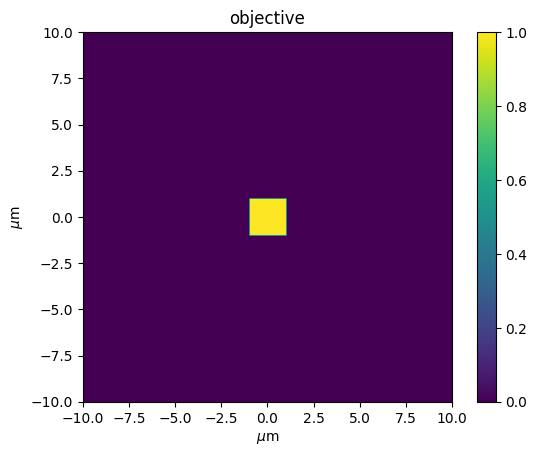

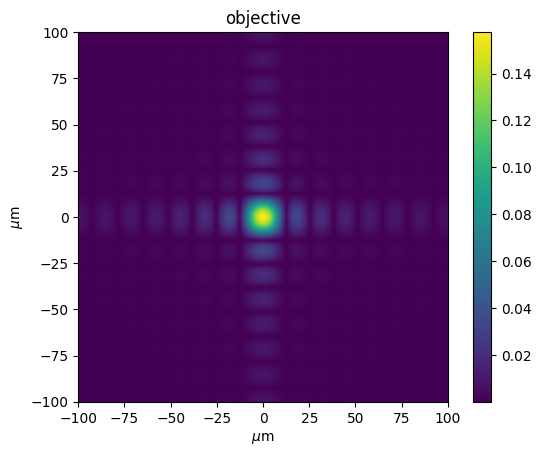

In [15]:
def get_circle(halfn):
    r = 100
    X = torch.arange(-halfn, halfn) ** 2 + torch.arange(-halfn, halfn).unsqueeze(-1) ** 2
    idx = X < r ** 2
    n_idx = X >= r ** 2

    X[n_idx] = 0
    X[idx] = 1
    return X

def get_square(halfn):
    s = 10
    idx = torch.arange(halfn - s, halfn + s)
    idx = (idx.repeat(2 * s).int(), 
        idx.repeat_interleave(2 * s).int())
    

    X = torch.zeros((halfn * 2, halfn * 2))
    X[idx] = 1
    return X

def get_obj(get_x=get_circle):
    n = 10000 # <~10000
    halfn = n // 2
    X = get_x(halfn)

    X = X.cuda()
    X = X / X.max() # normalize
    X = X.to(torch.complex128) # NOTE: complex 64 induces accumulated error which is catastrophic
    return X

# preprocess

def cut(X, show_ratio):
    halfn = X.shape[0] // 2
    lower = int(halfn * (1 - show_ratio))
    higher = int(halfn * (1 + show_ratio))
    
    return X[lower: higher, lower:higher]

def show_mat(X, pixel, show_ratio=1):
    X = cut(X, show_ratio)
    halfn = X.shape[0] // 2
    
    X = X.abs().cpu().numpy()

    fig, ax = plt.subplots(1, 1)
    s = ax.imshow(
        X, 
        extent=[-halfn * pixel, halfn * pixel, -halfn * pixel, halfn * pixel]
    )
    ax.set_xlabel('$\mu$m')
    ax.set_ylabel('$\mu$m')
    ax.set_title('objective')
    fig.colorbar(s)

    return



# plt.show(get_show_mat(X))

wl = 0.500
grid = 0.1
z = 2000

X = prop.propagate(get_obj(get_square), grid, wl, z)
# (resolved) bug: X almost explodes, caused inadequate precision
# (resolved) bug: suspicious square shape, because of parameter setting (Fourier transform induces periodic boundary condition, which essentially superinposes the pattern from replicated same obejctive)

show_mat(get_obj(get_square), grid, show_ratio=0.02)
show_mat(X, grid, show_ratio=0.2)

- scale of objective
    - hole
        - user: input image
        - we fix the physical length of a pixel (1nm)
    - zero padding = n * hole
- wl
- z
